In [1]:
import datetime
import pandas as pd
import Factor_classes

%load_ext autoreload
%autoreload 2

In [2]:
# se togli i seguenti ticker da Tickers.json, la strategia migliore diventa random forest:
#"IG.MI", "LDO.MI", "REC.MI",
#"STLAM.MI", "STMMI.MI", "TRN.MI", 
#"AZM.MI", "BPSO.MI", "ERG.MI"

In [3]:
start_date = datetime.datetime(2017, 1, 1)
end_date = datetime.datetime(2024, 1, 1)

stock_data = Factor_classes.StockData(start_date, end_date)
returns = stock_data.returns
index_returns = stock_data.index_returns

In [4]:
returns.tail(3)

Ticker,A2A.MI,AMP.MI,AZM.MI,BAMI.MI,BC.MI,BMED.MI,BMPS.MI,BPE.MI,BPSO.MI,CPR.MI,...,REC.MI,SPM.MI,SRG.MI,STLAM.MI,STMMI.MI,TEN.MI,TIT.MI,TRN.MI,UCG.MI,UNI.MI
Date,,,,,,,,,,,,,,,,,,,,,
2023-10-31,-0.036302,-0.057525,-0.034531,0.033469,-0.047368,-0.036450,-0.061018,0.036468,0.110658,-0.072374,...,-0.027754,-0.033333,-0.061186,0.065526,-0.057827,0.013154,0.028125,-0.053698,0.005291,-0.000776
2023-11-30,0.042084,-0.052874,-0.036249,0.063020,0.044890,-0.052813,0.064156,0.069334,0.051450,-0.068658,...,-0.024532,-0.008276,-0.032923,-0.009901,-0.115216,-0.021172,-0.170888,0.003616,0.042763,-0.006990
2023-12-31,0.117763,0.072312,0.120361,0.046110,0.004627,0.058610,0.217814,0.116129,0.108738,-0.040211,...,0.009145,0.023644,0.071792,0.110556,0.193681,0.081826,0.087169,0.026885,0.056572,0.035198


In [5]:
correlation_matrix = Factor_classes.CorrelationMatrix(returns)
#correlation_matrix.plot_heatmap()

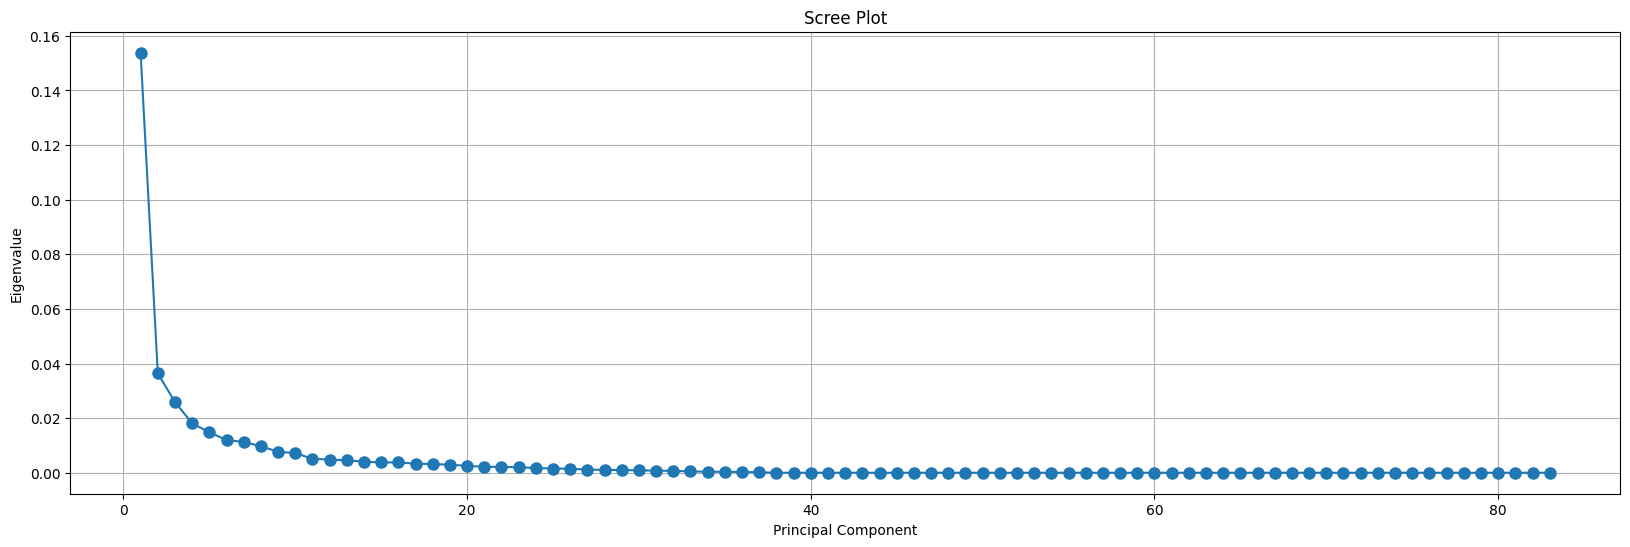

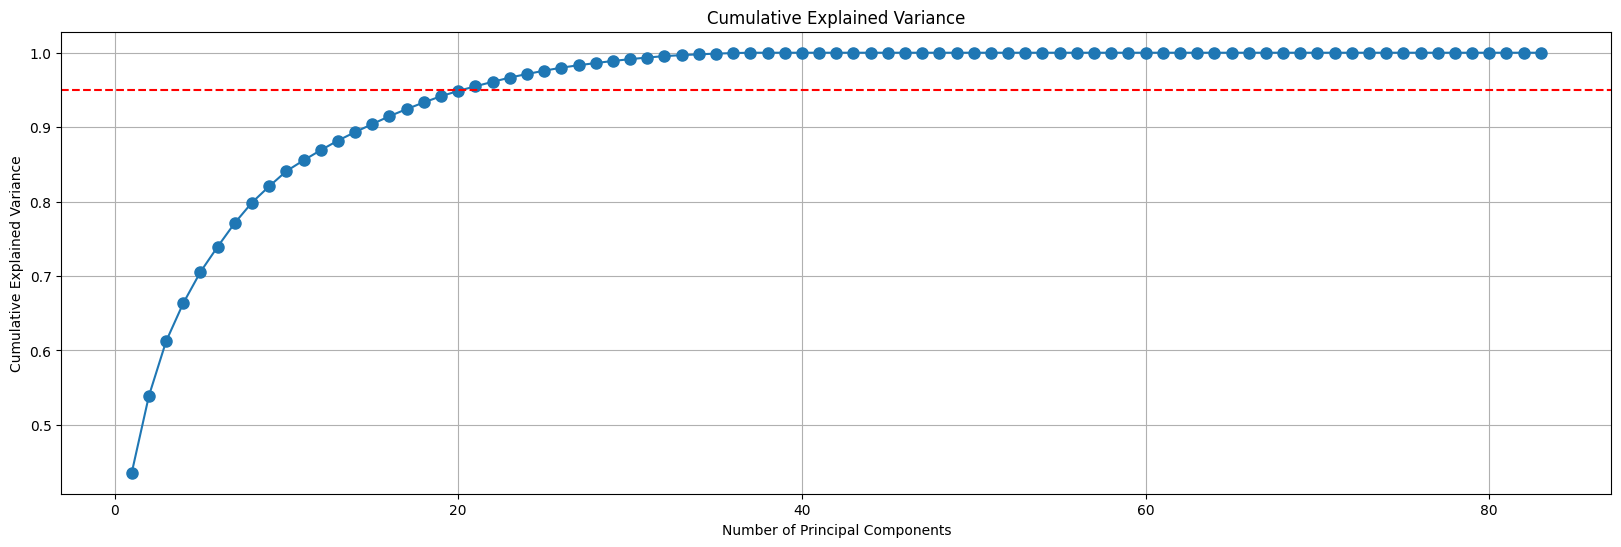

In [6]:
pca_analysis = Factor_classes.ComponentsAnalysis(stock_data.returns)
pca_analysis.plot_scree()
pca_analysis.plot_cumulative_explained_variance()

In [7]:
"""
m = 16 #explained variance 95
window_size = 36
max_iterations = 10000
factor_model = Factor_classes.APCA(returns, max_iterations=max_iterations)

U_m_final = factor_model.U_m_final
F_final = factor_model.F_final
B_final = factor_model.B_final
"""

'\nm = 16 #explained variance 95\nwindow_size = 36\nmax_iterations = 10000\nfactor_model = Factor_classes.APCA(returns, max_iterations=max_iterations)\n\nU_m_final = factor_model.U_m_final\nF_final = factor_model.F_final\nB_final = factor_model.B_final\n'

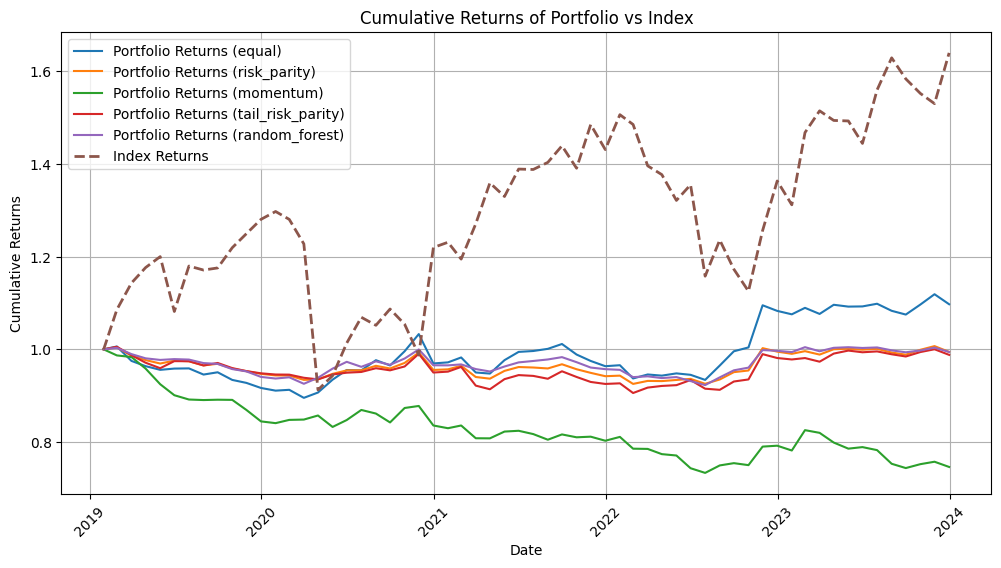

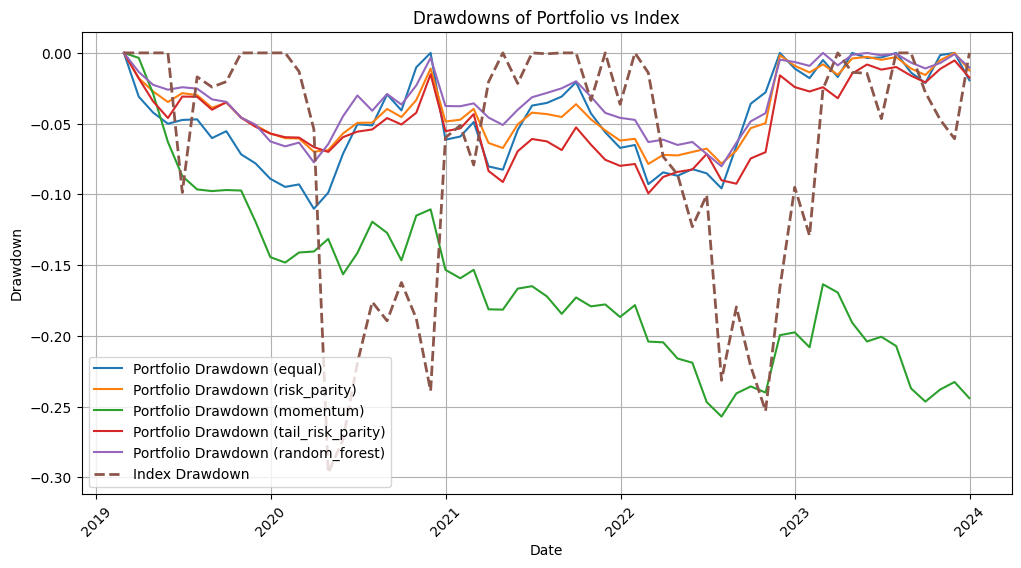

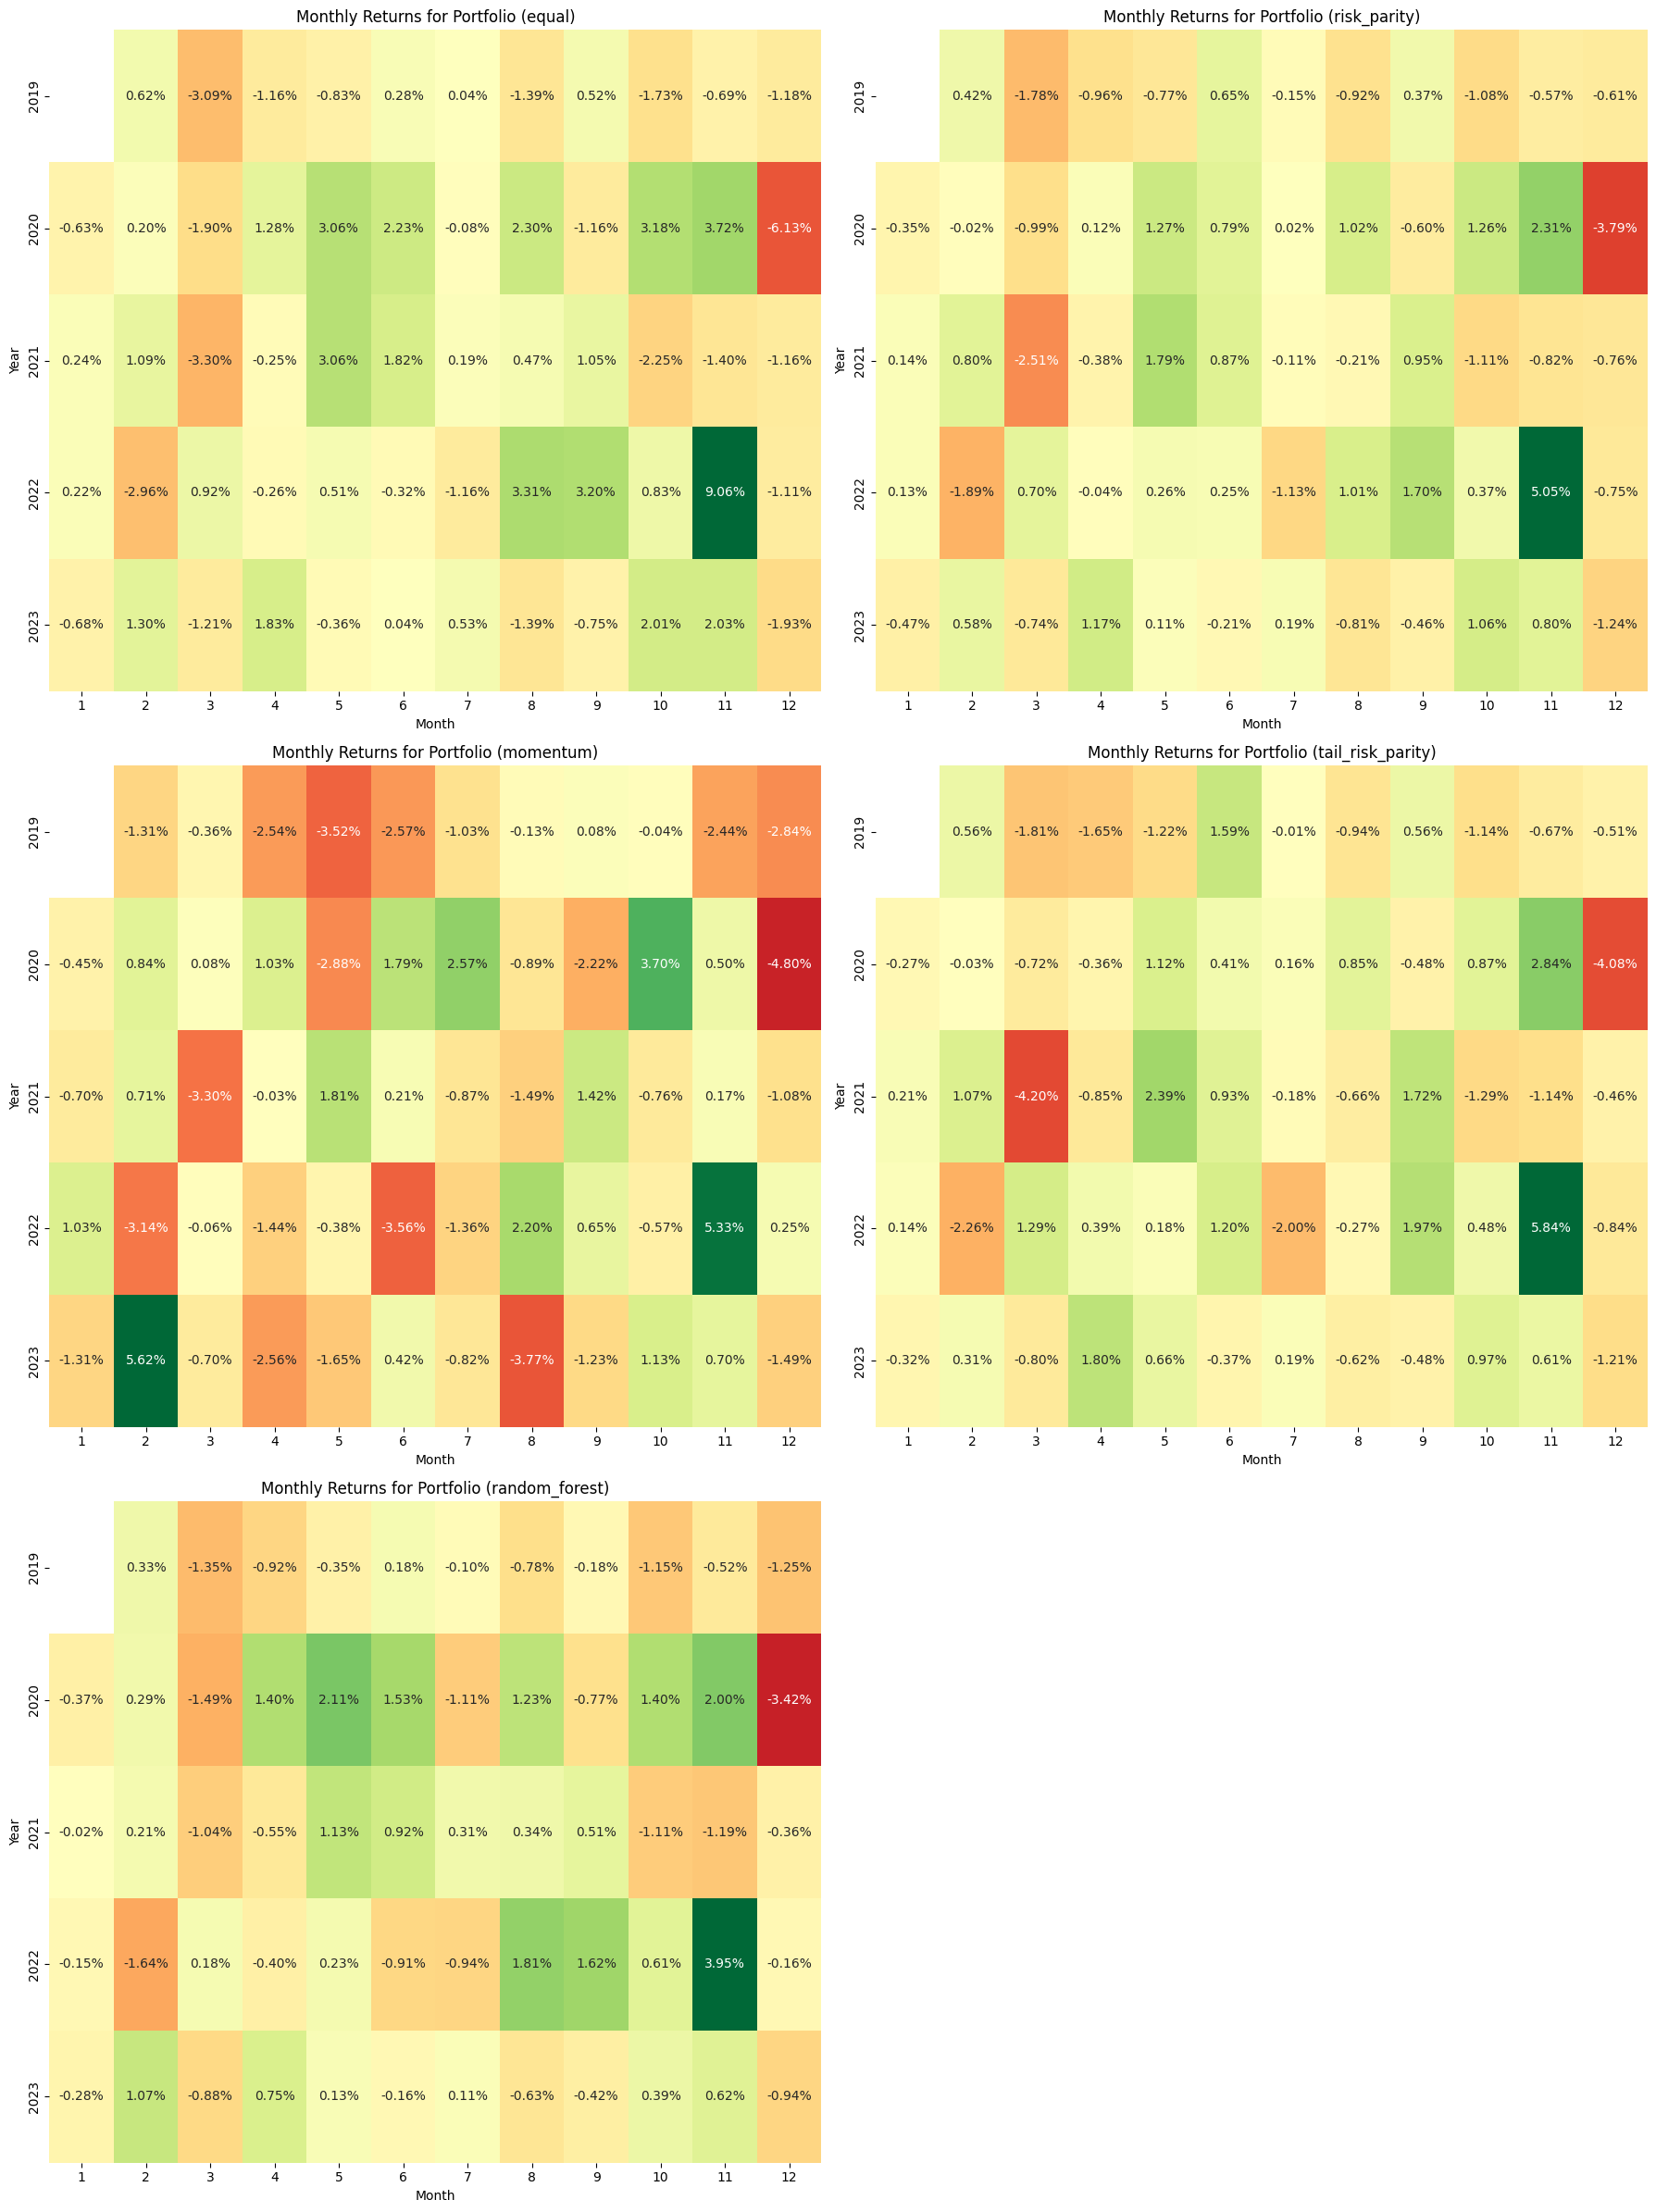

In [8]:
#con window size = 24, risultati ottimi con Random Forest
strategy = Factor_classes.RollingAPCAStrategy(returns, window_size=24, max_iterations=1000, transaction_cost=0.001, slippage=0.001)
index_cum_returns, portfolio_cum_returns = strategy.evaluate_strategies(index_returns)

In [9]:
index_test_rets = pd.DataFrame(index_cum_returns)
index_test_rets.rename(columns={'Open': 'Benchmark'}, inplace=True)

index_test_rets.head(3)

,Benchmark
Date,
2019-02-28,0.085752
2019-03-31,0.052957
2019-04-30,0.029137


In [10]:
index_stats = Factor_classes.FinancialMetrics.summary_stats(index_test_rets)

index_stats

,Annualized Return,Annualized Volatility,Semi-Deviation,Skewness,Kurtosis,Historic VaR (5%),Cornish-Fisher VaR (5%),Historic CVaR (5%),Return on VaR,Sharpe Ratio,Sortino Ratio,Calmar Ratio,Modified Burke Ratio,Max Drawdown,Net Profit to Worst Drawdown,Beta,Treynor Ratio,Tracking Error,Information Ratio,Tail Ratio
Benchmark,0.1059,0.2394,0.182,-0.499,6.9112,0.0666,0.1059,0.167,1.5894,0.3081,0.4053,0.2485,0.6648,-0.2968,2.1564,1,0,0,0,1.3998


In [11]:
portfolio_test_rets = pd.DataFrame(portfolio_cum_returns)

portfolio_test_rets.head(3)

,equal,risk_parity,momentum,tail_risk_parity,random_forest
2019-02-28,0.006161,0.004235,-0.013082,0.005592,0.003281
2019-03-31,-0.030950,-0.017819,-0.003552,-0.018059,-0.013492
2019-04-30,-0.011568,-0.009598,-0.025351,-0.016501,-0.009198


In [12]:
portfolio_stats = Factor_classes.FinancialMetrics.summary_stats(portfolio_test_rets, market=index_test_rets)

portfolio_stats

,Annualized Return,Annualized Volatility,Semi-Deviation,Skewness,Kurtosis,Historic VaR (5%),Cornish-Fisher VaR (5%),Historic CVaR (5%),Return on VaR,Sharpe Ratio,Sortino Ratio,Calmar Ratio,Modified Burke Ratio,Max Drawdown,Net Profit to Worst Drawdown,Beta,Treynor Ratio,Tracking Error,Information Ratio,Tail Ratio
equal,0.0191,0.0759,0.0432,0.8089,6.7982,0.0297,0.0270,0.0418,0.6418,-0.1401,-0.2385,-0.0965,-0.1893,-0.1102,0.8839,-0.0503,0.2113,0.0757,-1.7705,1.0793
risk_parity,-0.0011,0.0434,0.0272,0.6226,7.0683,0.0179,0.0171,0.0273,-0.0627,-0.6980,-1.0827,-0.3859,-0.6582,-0.0785,-0.0703,-0.0307,0.9871,0.0723,-2.0777,0.9521
momentum,-0.0578,0.0704,0.0426,0.6310,4.0892,0.0352,0.0337,0.0404,-1.6408,-1.2151,-1.9243,-0.3326,-0.4888,-0.2570,-0.9879,-0.0055,15.4611,0.0724,-2.7346,0.7610
tail_risk_parity,-0.0024,0.0527,0.0347,0.4319,6.4654,0.0203,0.0220,0.0351,-0.1199,-0.5987,-0.8940,-0.3179,-0.5666,-0.0993,-0.1199,-0.0376,0.8387,0.0733,-2.0719,0.9905
random_forest,-0.0012,0.0399,0.0226,0.4622,4.8312,0.0136,0.0168,0.0219,-0.0848,-0.7602,-1.2562,-0.3783,-0.7526,-0.0802,-0.0708,-0.0327,0.9283,0.0723,-2.0777,1.3396


# To do

1. Controllare Random Forest
2. Provare diverse tecniche di ML
3. Ottimizzare window size